# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zikra Daffa Saputra
- **Email:** M119B4KY4623@bangkit.academy
- **ID Dicoding:** zikra_ds

## Menentukan Pertanyaan Bisnis

- Faktor apa yang paling memengaruhi penggunaan jumlah perentalan sepeda?
- Bagaimana penggunaan sepeda rental bervariasi pada waktu yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/121140018-Zikra/Data-Analysis/refs/heads/main/Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/121140018-Zikra/Data-Analysis/refs/heads/main/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca isi dari file `day.csv` dan menyimpannya sebagai dataframe dengan fungsi `read_csv` dari library `pandas` pada objek `day_df`
- Membaca isi dari file `hour.csv` dan menyimpannya sebagai dataframe dengan fungsi `read_csv` dari library `pandas` pada objek `hour_df`

`day_df` adalah dataframe yang menyimpan data dari sebuah rental sepeda dalam bentuk harian, sedangkan `hour_df` adalah datafram akan menyimpan data sewa tiap jam setiap hari.

### Assessing Data

#### Assessing Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:** Dari hasil pemeriksaan dataframe `day_df` diatas ditemukan terdapat kesalahan tipe data pada field `dteday`. Field tersebut seharusnya bertipe data *datetime* dan bukan *object*.

#### Assessing Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** Dari hasil pemeriksaan dataframe `hour_df` juga ditemukan terdapat kesalahan tipe data pada field `dteday`. Sama seperti pada dataframe `day_df`, field tersebut seharusnya bertipe data *datetime* dan bukan *object*.

### Cleaning Data

#### Memperbaiki tipe data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:** Dilakukan penyesuaian tipe data terhadap field `dteday` pada dataframe `day_df` dan `hour_df` menjadi tipe data *datetime*

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


In [16]:
day_df.groupby(['season', 'mnth'])['cnt'].sum()

season  mnth
1       1       134933
        2       151352
        3       142065
        12       42998
2       3        86855
        4       269094
        5       331686
        6       230954
3       6       115388
        7       344948
        8       351194
        9       249599
4       9        96392
        10      322352
        11      254831
        12      168038
Name: cnt, dtype: int64

- 1 = Musim Semi
- 2 = Musim Panas
- 3 = Musim Gugur
- 4 = Musim Dingin

Jumlah perental sepeda terbanyak adalah ketika sedang Musim Gugur (1.061.129 perental) dan paling sedikit adalah ketika sedang Musim Semi (471.348 perental)

In [17]:
hour_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


- 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Banyak orang merental sepeda pada cuaca 1 (cerah hingga berawan)

In [18]:
hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Jumlah perental terbanyak terdapat pada jam 17 dan 18, kemungkinan hal ini disebabkan adalah karena jam tersebut merupakan jam pulang kerja. Jumlah perental juga cukup banyak pada jam 8 yang kemungkinan ini adalah jam berangkat kerja.

In [19]:
day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


In [20]:
day_df.groupby('workingday')['cnt'].sum()

,cnt
workingday,
0,1000269
1,2292410


Jumlah perental sepeda lebih banyak ketika hari kerja dibandingkan dengan weekend (Sabtu dan Minggu) atau hari libur.

In [21]:
day_df.corr()['cnt'].sort_values(ascending=False)

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
dteday,0.628830
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977


## Visualization & Explanatory Analysis

### Faktor apa yang paling memengaruhi penggunaan jumlah perentalan sepeda?:

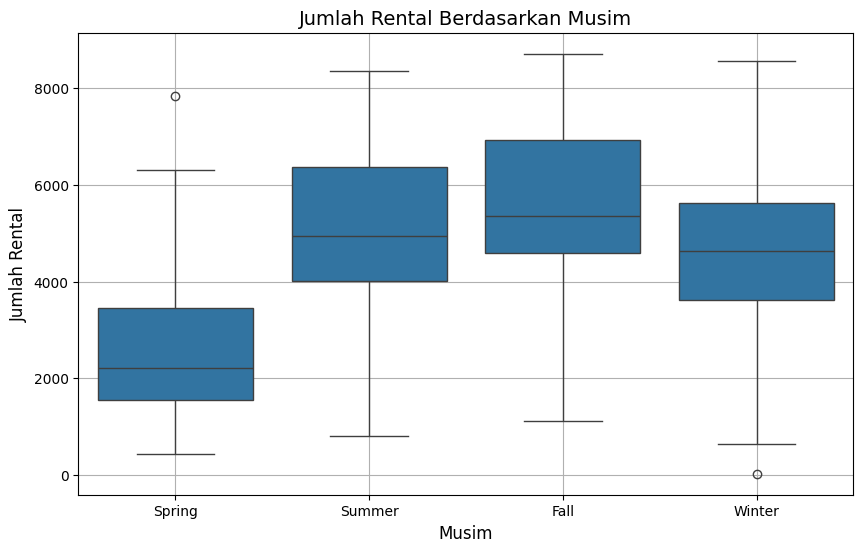

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Jumlah Rental Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Rental', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
plt.show()

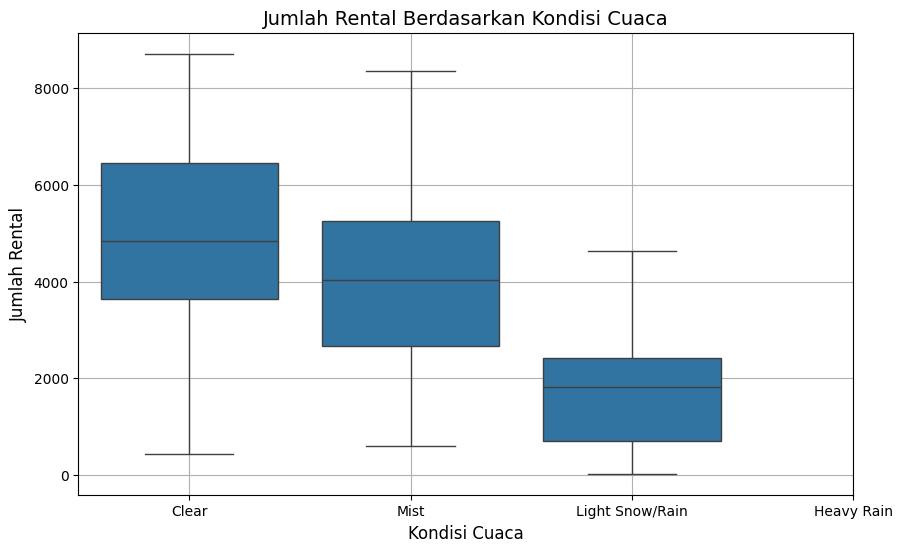

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Jumlah Rental Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Rental', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'])
plt.grid(True)
plt.show()

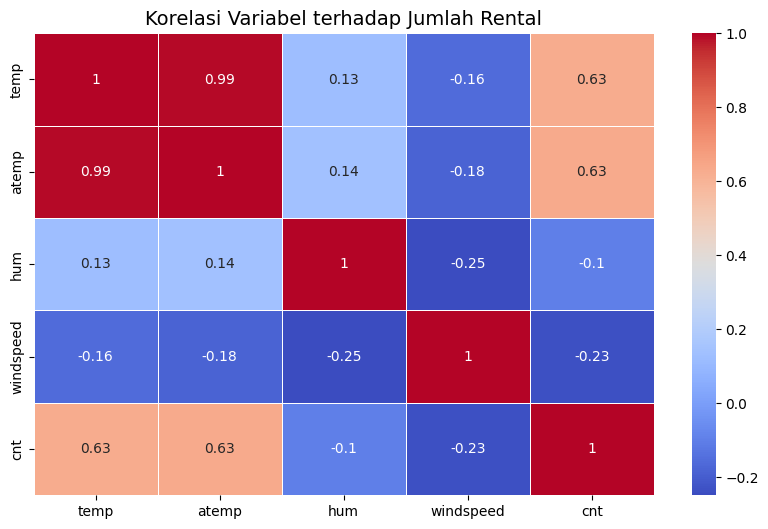

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Variabel terhadap Jumlah Rental', fontsize=14)
plt.show()

### Bagaimana penggunaan sepeda rental bervariasi pada waktu yang berbeda?:

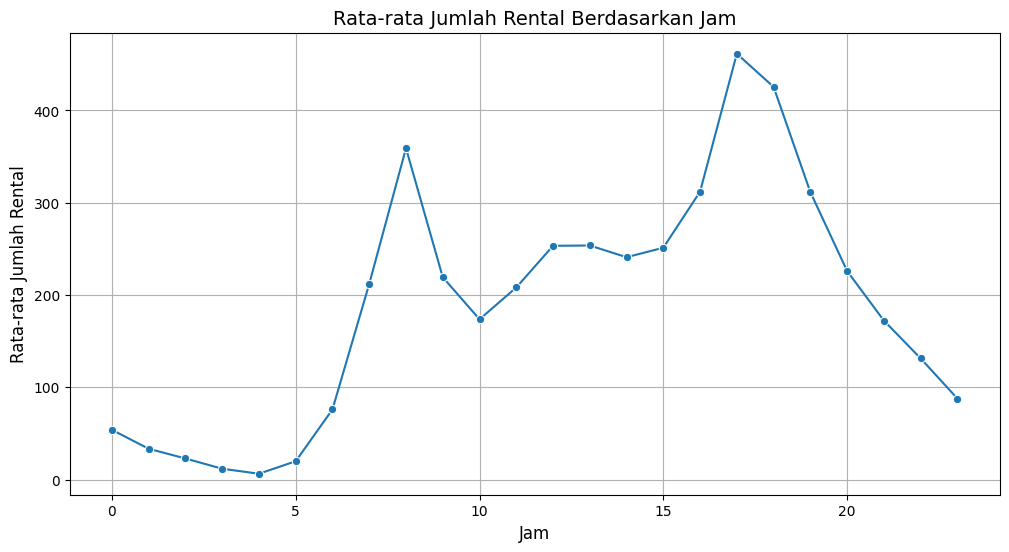

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df.groupby('hr')['cnt'].mean().reset_index(), marker='o')
plt.title('Rata-rata Jumlah Rental Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Rental', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**
- Pengguna rental sepeda lebih banyak pada musim panas dan cuaca cerah
- Temperatur atau suhu memiliki pengaruh pada jumlah pengguna dilihat dengan nilai korelasinya.
- Penggunaan rental sepeda lebih banyak pada jam 8 dan 17 yang kemungkinan merupakan jam berangkat dan pulang kerja

## Conclusion

- Musim, cuaca, dan temperatur memiliki pengaruh kuat terhadap jumlah pengguna rental sepeda. Pada musim gugur dan cuaca cerah memiliki jumlah pengguna yang lebih banyak. Sebaliknya pada musim dingin dan cuaca ekstrim jumlah pengguna turun drastis.
- Berdasarkan waktu penggunaan, terdapat lonjakan signifikan pada jam-jam sibuk, yakni pagi hari sekitar pukul 08:00 dan sore hari antara pukul 17:00 hingga 18:00. Hal ini mengindikasikan bahwa bike-sharing banyak digunakan sebagai sarana transportasi saat berangkat dan pulang kerja.